<a href="https://colab.research.google.com/github/DarshiniMH/Facial-Emotion-detection-using-CNN/blob/main/Facial_Emotion_Detection_Full_Code_Darshini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facial Emotion Detection**

## **Problem Definition**

Solving facial emotion detection with CNN is crucial for enhancing human-computer interaction, enabling machines to respond appropriately to human emotions, which is vital in areas like healthcare for monitoring patients, in automotive for assessing driver alertness, or in customer service to gauge satisfaction.

The goal is to accurately classify different human emotions from facial expressions and finding the optimal model to achieve this.

Key questions include how to ensure high accuracy across diverse populations and conditions, and what features most effectively indicate specific emotions. To find if there is a need to modify the training dataset to achieve our goal while also considering computational costs. We're employing data science to develop a predictive model that can interpret and classify the emotional states represented in facial expressions, making technology more intuitive and responsive to human needs.



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## **Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import os
import zipfile

import cv2
import seaborn as sns

#libraries to build cnn models
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,GlobalAveragePooling2D, BatchNormalization, Activation, Input, LeakyReLU, Dropout, Flatten
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import optimizers, losses
from tensorflow.keras.preprocessing.image import load_img
from google.colab.patches import cv2_imshow
from tensorflow.keras.regularizers import l2


from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


### **Let us load and unzip the data**

In [ ]:
#load the zipfile that contain the dataset
pathZip= '/content/drive/MyDrive/Colab Notebooks/Facial_emotion_images.zip'

In [ ]:
# extract the contents in the zipfile to the environment
with zipfile.ZipFile(pathZip, 'r') as zip_ref:
  zip_ref.extractall()

## **Visualizing our Classes**

Let's look at our classes.


In [ ]:
# Different categories in the datset
CATEGORIES = ['happy','neutral','sad','surprise']

In [ ]:
# extract the images in training dataset and save to numpy array
DATADIR = '/content/Facial_emotion_images/train'
training_dataset= []

def create_training_data():
  for i in CATEGORIES:
   path = os.path.join(DATADIR, i)
   class_num = i

   for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    training_dataset.append([img_array, class_num])


In [ ]:
# extract the images in testing dataset and save to numpy array
DATADIR_TEST = '/content/Facial_emotion_images/test'
testing_dataset= []

def create_testing_data():
  for i in CATEGORIES:
   path = os.path.join(DATADIR_TEST, i)
   class_num = i

   for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    testing_dataset.append([img_array, class_num])

In [ ]:
# extract the images in validation dataset and save to numpy array
DATADIR_VALIDATION = '/content/Facial_emotion_images/validation'
validation_dataset= []

def create_validation_data():
  for i in CATEGORIES:
   path = os.path.join(DATADIR_VALIDATION, i)
   class_num = i

   for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    validation_dataset.append([img_array, class_num])

In [ ]:
# instantiate the create training dataset function
create_training_data()
# check the number of images in the training dataset that is saved in 'training_dataset' array
len(training_dataset)

15109

In [ ]:
# instantiate the create testing dataset function
create_testing_data()
# check the number of images in the testing dataset that is saved in 'testing_dataset' array
len(testing_dataset)

128

In [ ]:
# instantiate the create validation dataset function
create_validation_data()
# check the number of images in the validation dataset that is saved in 'validation_dataset' array
len(validation_dataset)

4977

array([[[113, 113, 113],
        [ 93,  93,  93],
        [ 31,  31,  31],
        ...,
        [ 89,  89,  89],
        [ 87,  87,  87],
        [ 91,  91,  91]],

       [[109, 109, 109],
        [116, 116, 116],
        [ 32,  32,  32],
        ...,
        [101, 101, 101],
        [ 88,  88,  88],
        [ 96,  96,  96]],

       [[ 84,  84,  84],
        [123, 123, 123],
        [ 66,  66,  66],
        ...,
        [103, 103, 103],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       ...,

       [[ 22,  22,  22],
        [ 39,  39,  39],
        [ 59,  59,  59],
        ...,
        [112, 112, 112],
        [105, 105, 105],
        [111, 111, 111]],

       [[ 20,  20,  20],
        [ 35,  35,  35],
        [ 55,  55,  55],
        ...,
        [107, 107, 107],
        [104, 104, 104],
        [109, 109, 109]],

       [[ 22,  22,  22],
        [ 36,  36,  36],
        [ 55,  55,  55],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [105, 105, 105]]], dtype=uint8)
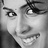

In [ ]:
training_dataset[0][0]

### **Happy**

In [ ]:
# Check for the images in the category Happy
Happy_imgs = [fn for fn in os.listdir(f"{DATADIR}/{CATEGORIES[0]}")]
select_happy = np.random.choice(Happy_imgs,9, replace = False)
len(Happy_imgs)

3976

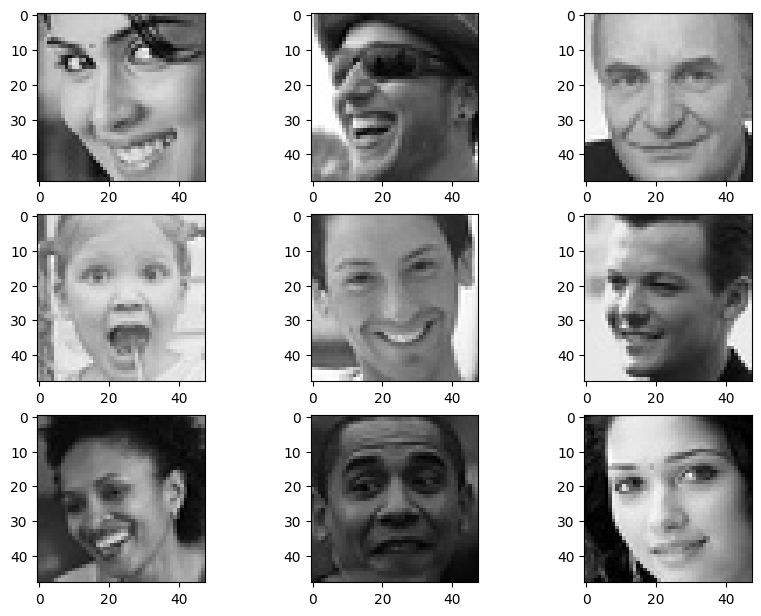

In [ ]:
#print the images in Happy category
fig = plt.figure(figsize = (10,10))

for i in range(9):
  ax = fig.add_subplot(4,3,i+1)

  fp = f'{DATADIR}/{CATEGORIES[0]}/{Happy_imgs[i]}'

  fn = load_img(fp)

  plt.imshow(fn,)

### **Neutral**

In [ ]:
# Check for the images in the category Neutral

Neutral_imgs = [fn for fn in os.listdir(f"{DATADIR}/{CATEGORIES[1]}")]
select_neutral = np.random.choice(Neutral_imgs,9, replace = False)
len(Neutral_imgs)

3978

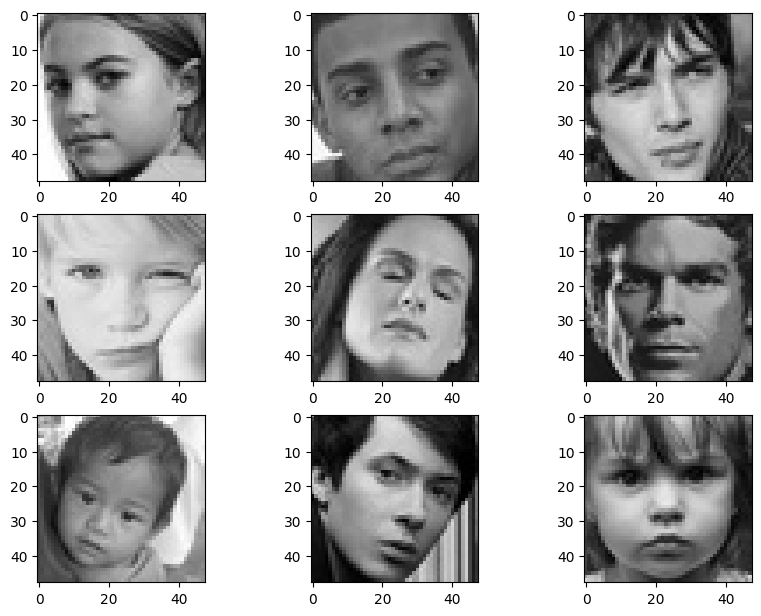

In [ ]:
#print the images in Neutral category

fig = plt.figure(figsize = (10,10))

for i in range(9):
  ax = fig.add_subplot(4,3,i+1)

  fp = f'{DATADIR}/{CATEGORIES[1]}/{select_neutral[i]}'

  fn = load_img(fp)

  plt.imshow(fn,)

### **Sad**

In [ ]:
# Check for the images in the category Sad

Sad_imgs = [fn for fn in os.listdir(f"{DATADIR}/{CATEGORIES[2]}")]
select_sad = np.random.choice(Sad_imgs,9, replace = False)
len(Sad_imgs)

3982

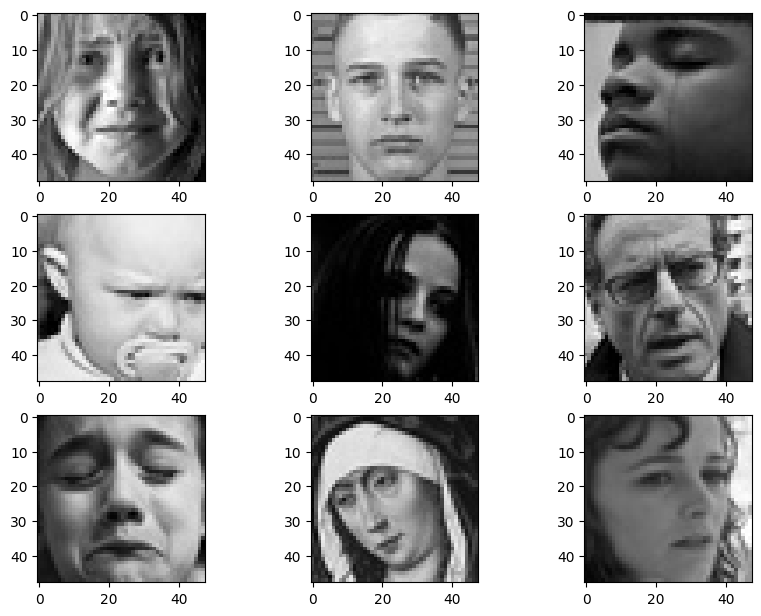

In [ ]:
#print the images in Sad category

fig = plt.figure(figsize = (10,10))

for i in range(9):
  ax = fig.add_subplot(4,3,i+1)

  fp = f'{DATADIR}/{CATEGORIES[2]}/{select_sad[i]}'

  fn = load_img(fp)

  plt.imshow(fn,)

### **Surprised**

In [ ]:
# Check for the images in the category Surprised

Surprise_imgs = [fn for fn in os.listdir(f"{DATADIR}/{CATEGORIES[3]}")]
select_surprise = np.random.choice(Surprise_imgs,9, replace = False)
len(Surprise_imgs)

3173

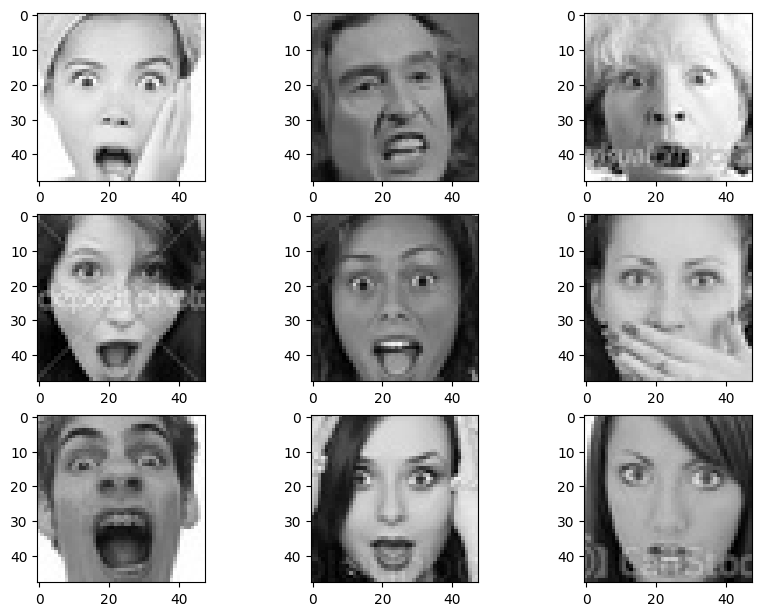

In [ ]:
#print the images in Surprise category

fig = plt.figure(figsize = (10,10))

for i in range(9):
  ax = fig.add_subplot(4,3,i+1)

  fp = f'{DATADIR}/{CATEGORIES[3]}/{select_surprise[i]}'

  fn = load_img(fp)

  plt.imshow(fn,)

**Observations:**

1. Images are in RGB format and is of size 48*48. But the colour of image is black and white
2. Number of images in the surprise category is ~3170 and for other 3 categories it is around ~4000 images. Howere since the images under Surise category have characteristics that gives it a clear distinction, the model might be able to differenciate. We will know once model is trained

2. images in class Sad and Neutral kind of look same, therefore model might have difficulty to differenciate between them.

## **Checking Distribution of Classes**

**Training:**


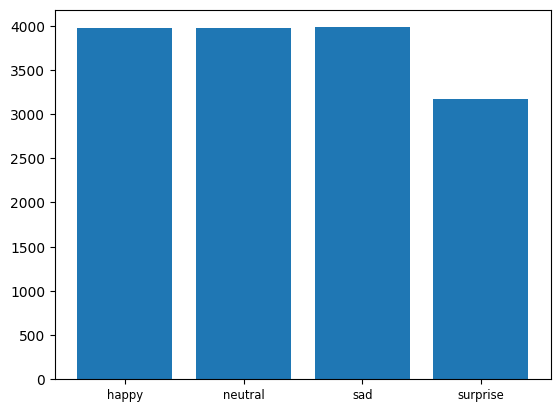

In [ ]:
num_happy = len(Happy_imgs)
num_neutral = len(Neutral_imgs)
num_sad = len(Sad_imgs)
num_surprise = len(Surprise_imgs)

data= {'happy' : num_happy, 'neutral' : num_neutral, 'sad' : num_sad, 'surprise': num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index, size = 'small')

plt.show()

**Testing**

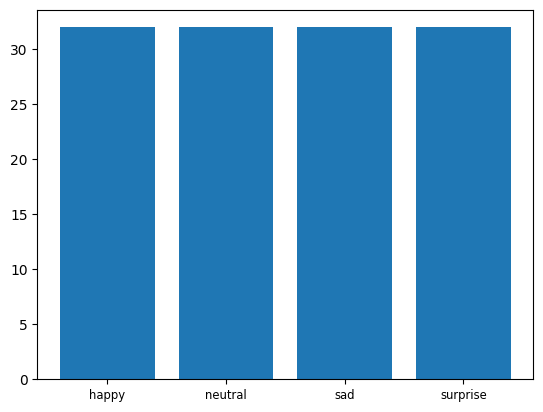

In [ ]:
num_happy = len(os.listdir(f"{DATADIR_TEST}/{CATEGORIES[0]}"))
num_neutral = len(os.listdir(f"{DATADIR_TEST}/{CATEGORIES[1]}"))
num_sad = len(os.listdir(f"{DATADIR_TEST}/{CATEGORIES[2]}"))
num_surprise = len(os.listdir(f"{DATADIR_TEST}/{CATEGORIES[3]}"))

data= {'happy' : num_happy, 'neutral' : num_neutral, 'sad' : num_sad, 'surprise': num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index, size = 'small')

plt.show()

**Validation**

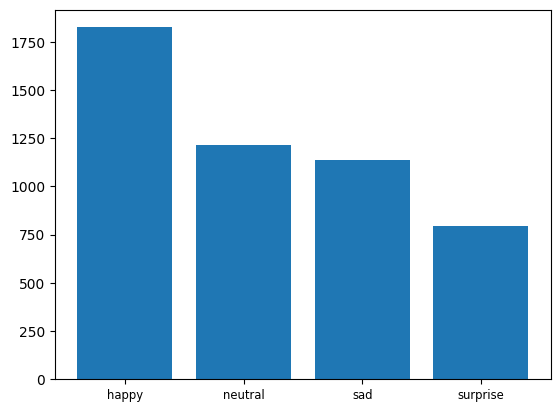

In [ ]:
num_happy = len(os.listdir(f"{DATADIR_VALIDATION}/{CATEGORIES[0]}"))
num_neutral = len(os.listdir(f"{DATADIR_VALIDATION}/{CATEGORIES[1]}"))
num_sad = len(os.listdir(f"{DATADIR_VALIDATION}/{CATEGORIES[2]}"))
num_surprise = len(os.listdir(f"{DATADIR_VALIDATION}/{CATEGORIES[3]}"))

data= {'happy' : num_happy, 'neutral' : num_neutral, 'sad' : num_sad, 'surprise': num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index, size = 'small')

plt.show()

**Think About It:**
* Distribution of test dataset is balanced however there is imbalance in validation set.

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.


**Resized image data loading**


In [ ]:
# function to resize image to make it compatible with transfer learning model
IMG_SIZE = 224

def resize_image(resized_dataset, DATADIR):

  for i in CATEGORIES:
    path = os.path.join(DATADIR, i)
    class_num = CATEGORIES.index(i)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
      resized_dataset.append([new_array,class_num])

  return resized_dataset




In [ ]:
# Resizing the training dataset
DATADIR = '/content/Facial_emotion_images/train'
resized_training_data = []
resized_training_data = resize_image(resized_training_data, DATADIR)
len(resized_training_data)

15109

In [ ]:
# resizing the testing dataset
DATADIR = '/content/Facial_emotion_images/test'
resized_testing_data = []
resized_testing_data = resize_image(resized_testing_data, DATADIR)

In [ ]:
#resizing validation dataset
DATADIR = '/content/Facial_emotion_images/validation'
resized_validating_data = []
resized_validating_data = resize_image(resized_validating_data, DATADIR)

In [ ]:
# since the sad and neutral images almost look same, adding some noise to differentiate them
training_data_noise= []

def create_training_data_noise():
  for i in CATEGORIES:
   path = os.path.join(DATADIR, i)
   class_num = i

   # adding noise to the images. for sad images noise is mean of 0 and SD 0.02
   noise_sad = np.random.normal(0, 0.02, (48,48,3))
   # for neutral images, adding noise with mean 0 and SD 0.025
   noise_neutral = np.random.normal(0, 0.025, (48,48,3))


   if i == 'sad':
    for img in os.listdir(path):
     img_array = cv2.imread(os.path.join(path,img))
     noisy_image = img_array + noise_sad
     training_data_noise.append([noisy_image, class_num])
   elif i == 'neutral':
    for img in os.listdir(path):
     img_array = cv2.imread(os.path.join(path,img))
     noisy_image = img_array + noise_neutral
     training_data_noise.append([noisy_image, class_num])
   else:
    for img in os.listdir(path):
     img_array = cv2.imread(os.path.join(path,img))
     training_data_noise.append([img_array, class_num])



In [ ]:
create_training_data_noise()

In [ ]:
# copying all training images to X_train and labels to Y train
def training_data(training_data_noise):
  X_train = []
  y_train = []

  np.random.shuffle(training_data_noise)

  for features, label in training_data_noise:
    X_train.append(features)
    y_train.append(label)

# creating dataframe for y_train
  y_train = pd.DataFrame(y_train, columns = ['Label'], dtype = object)
  y_train.Label.value_counts()

# converting X_train to np array for making it compatible to train the model
  X_train = np.array(X_train)
  X_train.shape
  return X_train, y_train


In [ ]:
# copying all training images to X_validation and labels to Y_validation
def validation_data(validation_dataset):
  X_validate = []
  y_validate = []

  for features, label in validation_dataset:
    X_validate.append(features)
    y_validate.append(label)
# creating dataframe for y_validation
  y_validate = pd.DataFrame(y_validate, columns = ['Label'], dtype = object)

# converting X_validation to np array for making it compatible to train the model
  X_validate = np.array(X_validate)

  return X_validate, y_validate

In [ ]:
# copying all training images to X_test and labels to Y_test

def test_data(testing_dataset):
  X_test = []
  y_test = []

  for features, label in testing_dataset:
    X_test.append(features)
    y_test.append(label)
# creating dataframe for y_vtest

  y_test = pd.DataFrame(y_test, columns = ['Label'], dtype = object)
# converting X_test to np array for making it compatible to train the model
  X_test = np.array(X_test)

  return X_test, y_test

In [ ]:
# noralise the input array to deal with exploding and diminishing gradients
def normalize(X_train,X_test,X_validate):
  X_train = X_train/255.0
  X_test = X_test/255.0
  X_validate = X_validate/255.0

  return X_train, X_test, X_validate

In [ ]:
from sklearn.preprocessing import LabelEncoder
# create label encoder for training, testing and valdation set
def label_encoder(y_train,y_test,y_validate):
  label_encoder = LabelEncoder()
  y_train_int = label_encoder.fit_transform(y_train)
  y_test_int = label_encoder.transform(y_test)
  y_validate_int = label_encoder.transform(y_validate)

  y_train_encoded = to_categorical(y_train_int, num_classes=4)
  y_test_encoded = to_categorical(y_test_int, num_classes=4)
  y_validate_encoded = to_categorical(y_validate_int)

  return y_train_encoded, y_test_encoded, y_validate_encoded

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create data augmentation generator
def train_generator_1(X_train, y_train_encoded):
# Define your data augmentation parameters
  data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
  )

# Apply it to your dataset
  train_generator_1 = data_gen.flow(X_train, y_train_encoded, batch_size=32)
  return train_generator_1

In [ ]:
# initializing early stopping and model checkpoint to help in efficiently training the model and in preventing loss of progress.
es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose= 1, patience= 5)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode ='max', verbose = 1, save_best_only=True)

## **Model Building**


The reason CNN is used over ANN to train the model is because CNNs are designed to automatically and adaptively learn spatial hierarchies of features from images, making them more suitable facial emotion detection, where the recognition of patterns, shapes, and features is crucial. ANNs may not capture the spatial hierarchies in image data as effectively as CNN.

In [ ]:
#for reproducibality
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

### **Creating the Base Neural Network**

In [ ]:
len(training_dataset)

15928

In [ ]:
# load the parameters
X_train, y_train = training_data(training_dataset)
X_validate, y_validate = validation_data(validation_dataset)
X_test, y_test = test_data(testing_dataset)
X_train, X_validate, X_test = normalize(X_train, X_validate, X_test)
y_train_encoded, y_validate_encoded, y_test_encoded = label_encoder(y_train, y_validate, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
#clears the backend session to freeup memory
backend.clear_session()

In [ ]:
#basic model with 3 convolution layers, 1 dense layer, 3 pooling layers with relu activation
model = Sequential()

#1st conv layer
model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same', input_shape =(48,48,3)))
model.add(MaxPooling2D( padding = 'same'))

#2nd conv layer
model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D( padding = 'same'))

#3rd conv layer
model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D( padding = 'same'))

#flattening the data
model.add(Flatten())

#1st Dense layer
model.add(Dense(200, activation = 'relu'))

#output layer
model.add(Dense(4, activation = 'softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

### **Compiling and Training the Model**

In [ ]:
# adam optimizer with default learning rate, metrics used is accuracy and loss function is catagorical cross entropy
model.compile(optimizer= Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#fit the model
history_1 = model.fit(X_train, y_train_encoded, batch_size= 48, epochs = 1000, validation_data = (X_validate, y_validate_encoded), callbacks=[es,mc])

Epoch 1/1000
315/315 [==============================] - ETA: 0s - loss: 1.2596 - accuracy: 0.3992
Epoch 1: val_accuracy improved from -inf to 0.52562, saving model to best_model.h5
315/315 [==============================] - 8s 11ms/step - loss: 1.2596 - accuracy: 0.3992 - val_loss: 1.1098 - val_accuracy: 0.5256
Epoch 2/1000
  8/315 [..............................] - ETA: 2s - loss: 1.0750 - accuracy: 0.5417

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


315/315 [==============================] - ETA: 0s - loss: 1.0119 - accuracy: 0.5639
Epoch 2: val_accuracy improved from 0.52562 to 0.58328, saving model to best_model.h5
315/315 [==============================] - 3s 8ms/step - loss: 1.0119 - accuracy: 0.5639 - val_loss: 0.9927 - val_accuracy: 0.5833
Epoch 3/1000
313/315 [============================>.] - ETA: 0s - loss: 0.8885 - accuracy: 0.6206
Epoch 3: val_accuracy improved from 0.58328 to 0.63070, saving model to best_model.h5
315/315 [==============================] - 3s 8ms/step - loss: 0.8879 - accuracy: 0.6208 - val_loss: 0.9120 - val_accuracy: 0.6307
Epoch 4/1000
310/315 [============================>.] - ETA: 0s - loss: 0.8012 - accuracy: 0.6622
Epoch 4: val_accuracy improved from 0.63070 to 0.66707, saving model to best_model.h5
315/315 [==============================] - 3s 8ms/step - loss: 0.8017 - accuracy: 0.6618 - val_loss: 0.8207 - val_accuracy: 0.6671
Epoch 5/1000
310/315 [============================>.] - ETA: 0s - lo

In [ ]:
w = model.load_weights("/content/best_model.h5")
w

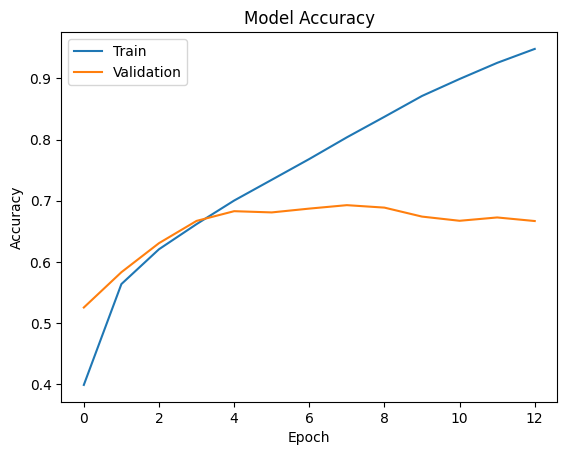

In [ ]:
#plot the training and validation accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Evaluating the Model on the Test Set**

In [ ]:
#check for the accuracy of trainied model on test data
accuracy = model.evaluate(X_test, y_test_encoded, verbose =1)

4/4 [==============================] - 0s 4ms/step - loss: 1.1499 - accuracy: 0.6719


In [ ]:
y_pred= model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
y_pred[100]

array([1.5260943e-04, 1.3578736e-04, 1.1829462e-04, 9.9959332e-01],
      dtype=float32)

In [ ]:
y_pred.shape

(128, 4)

In [ ]:
# Converting predicted probabilities to class indices for predictions and actual labels.
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg= np.argmax(y_test_encoded, axis=1)

In [ ]:
# check the precision, recall and f1-score of the output to evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test_arg,y_pred_arg))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77        32
           1       0.62      0.41      0.49        32
           2       0.52      0.69      0.59        32
           3       0.89      0.75      0.81        32

    accuracy                           0.67       128
   macro avg       0.69      0.67      0.67       128
weighted avg       0.69      0.67      0.67       128



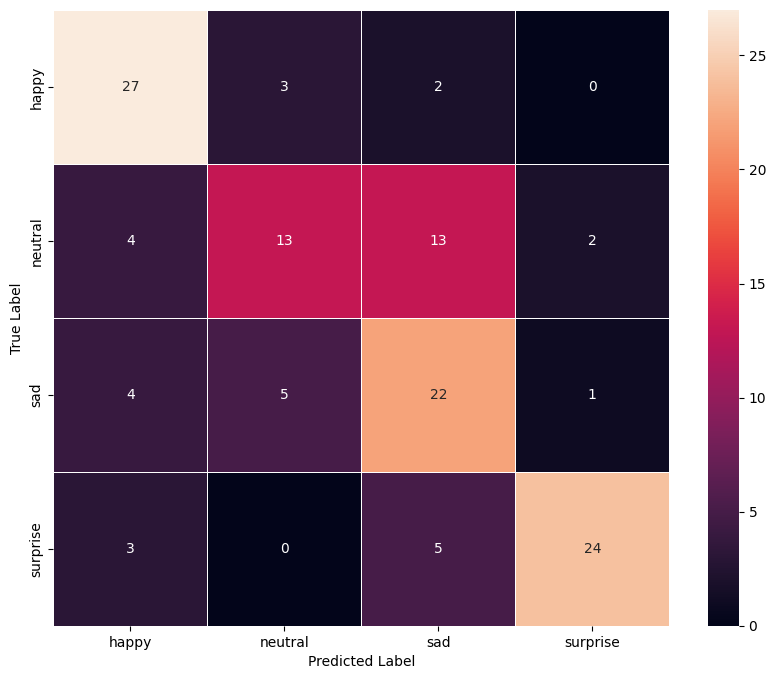

In [ ]:
#print the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax,
    xticklabels=['happy', 'neutral','sad', 'surprise'],
    yticklabels=['happy', 'neutral','sad', 'surprise']
)
ax.set_xlabel("Predicted Label")  # Set X-axis label here
ax.set_ylabel("True Label")
plt.show()

**Observations and Insights:**
1. This is a basic model with 3 convolutional layers without drop out and 1 single dense layer. the training images are used without the addition of  augmentation or noise
2.Accuracy of model on training data is 95%, on validation is 70% and on testing data is 67%.
2. Model is over fitting on training data.
3. the model is finding difficulty to classify neutral images by large extent and to same extent for surprise and sad images.

## **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [ ]:
backend.clear_session()

In [ ]:
# for reproducibility
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# adding noise to the training image
create_training_data_noise()

In [ ]:
# loading the model parameters
X_train, y_train = training_data(training_data_noise)
X_validate, y_validate = validation_data(validation_dataset)
X_test, y_test = test_data(testing_dataset)
X_train, X_validate, X_test = normalize(X_train, X_validate, X_test)
y_train_encoded, y_validate_encoded, y_test_encoded = label_encoder(y_train, y_validate, y_test)

# augmenting the training images
train_generator = train_generator_1(X_train, y_train_encoded)

len(training_data_noise)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


15109

In [ ]:
len(training_data_noise)

15109

In [ ]:
X_train.shape, X_test.shape, X_validate.shape

((15109, 48, 48, 3), (128, 48, 48, 3), (4977, 48, 48, 3))

In [ ]:
X_train.min(), X_train.max()

(-0.00035834181520628494, 1.000354053927727)

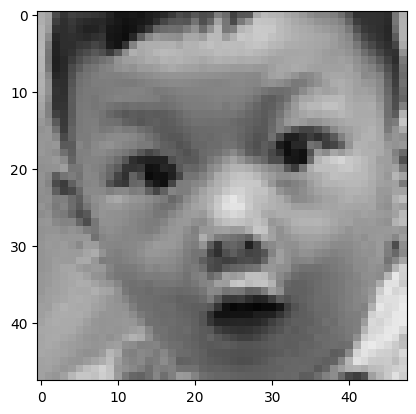

In [ ]:
plt.imshow(X_train[3])

In [ ]:
y_train

,Label
0,happy
1,surprise
2,sad
3,surprise
4,happy
...,...
15104,happy
15105,happy
15106,neutral
15107,sad


In [ ]:
model_1 = Sequential()

#1st conv layer
model_1.add(Conv2D(256, (3,3), padding = 'same', input_shape =(48,48,3)))
model_1.add(LeakyReLU(alpha=0.1))
model_1.add(MaxPooling2D(padding = 'same'))

#2nd Conv layer
model_1.add(Conv2D(64, (3,3), padding = 'same'))
model_1.add(LeakyReLU(alpha=0.1))

# adding batch normalisation to stabilise and speed up the training
model_1.add(BatchNormalization())

#3rd conv layer
model_1.add(Conv2D(256, (3,3), padding = 'same'))
model_1.add(LeakyReLU(alpha=0.1))
model_1.add(MaxPooling2D(padding = 'same'))

#4th conv layer
model_1.add(Conv2D(128,(3,3), padding = 'same'))
model_1.add(LeakyReLU(alpha=0.1))
model_1.add(MaxPooling2D((2,2), padding= 'same'))

model_1.add(BatchNormalization())

model_1.add(Flatten())

#1st dense layer
model_1.add(Dense(64))
model_1.add(LeakyReLU(alpha=0.1))

#2nd sense layer with Ridge regularizer
model_1.add(Dense(64,kernel_regularizer=l2(0.005)))
model_1.add(LeakyReLU(alpha=0.1))

#dropout layer
model_1.add(Dropout(0.5))

#output layer
model_1.add(Dense(4, activation='softmax'))

# adam optimizer with default learning rate, metrics used is accuracy and loss function is catagorical cross entropy
model_1.compile(optimizer = Adam(learning_rate=0.001),
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy'])

model_1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       7168      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        147520    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 24, 24, 64)        0         
                                                                 
 batch_normalization (Batch  (None, 24, 24, 64)        256       
 Normalization)                                         

In [ ]:
# fit the model
history_2 = model_1.fit(train_generator, batch_size= 32, epochs = 1000, validation_data = (X_validate, y_validate_encoded), callbacks=[es,mc])

Epoch 1/1000
472/473 [============================>.] - ETA: 0s - loss: 1.5969 - accuracy: 0.3334
Epoch 1: val_accuracy improved from -inf to 0.42596, saving model to best_model.h5
473/473 [==============================] - 22s 32ms/step - loss: 1.5964 - accuracy: 0.3334 - val_loss: 1.3848 - val_accuracy: 0.4260
Epoch 2/1000
  3/473 [..............................] - ETA: 13s - loss: 1.4913 - accuracy: 0.4375

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


473/473 [==============================] - ETA: 0s - loss: 1.3512 - accuracy: 0.4107
Epoch 2: val_accuracy improved from 0.42596 to 0.53506, saving model to best_model.h5
473/473 [==============================] - 14s 29ms/step - loss: 1.3512 - accuracy: 0.4107 - val_loss: 1.1854 - val_accuracy: 0.5351
Epoch 3/1000
472/473 [============================>.] - ETA: 0s - loss: 1.2135 - accuracy: 0.4763
Epoch 3: val_accuracy improved from 0.53506 to 0.55897, saving model to best_model.h5
473/473 [==============================] - 14s 29ms/step - loss: 1.2134 - accuracy: 0.4763 - val_loss: 1.0392 - val_accuracy: 0.5590
Epoch 4/1000
472/473 [============================>.] - ETA: 0s - loss: 1.1089 - accuracy: 0.5270
Epoch 4: val_accuracy improved from 0.55897 to 0.59574, saving model to best_model.h5
473/473 [==============================] - 14s 29ms/step - loss: 1.1089 - accuracy: 0.5268 - val_loss: 1.0282 - val_accuracy: 0.5957
Epoch 5/1000
472/473 [============================>.] - ETA: 0

In [ ]:
w = model_1.load_weights("/content/best_model.h5")
w

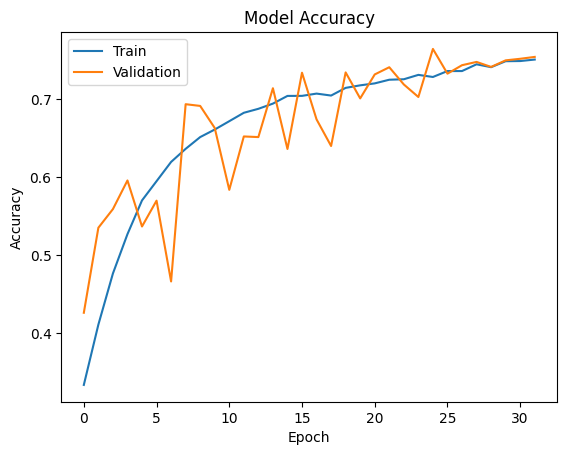

In [ ]:
#plot the training and validation accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Evaluating the Model on the Test Set**

In [ ]:
#check for the accuracy of trainied model on test data
accuracy = model_1.evaluate(X_test, y_test_encoded, verbose =1)

4/4 [==============================] - 0s 9ms/step - loss: 0.5364 - accuracy: 0.8281


In [ ]:
y_pred= model_1.predict(X_test)

4/4 [==============================] - 0s 7ms/step


In [ ]:
y_pred.shape

(128, 4)

In [ ]:
# Converting predicted probabilities to class indices for predictions and actual labels.
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg= np.argmax(y_test_encoded, axis=1)

In [ ]:
# evaluate the model on test data
from sklearn.metrics import classification_report
print(classification_report(y_test_arg,y_pred_arg))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        32
           1       0.73      0.84      0.78        32
           2       0.69      0.69      0.69        32
           3       0.97      0.91      0.94        32

    accuracy                           0.83       128
   macro avg       0.84      0.83      0.83       128
weighted avg       0.84      0.83      0.83       128



In [ ]:
y_train.Label.value_counts(normalize =True)

sad         0.263552
neutral     0.263287
happy       0.263154
surprise    0.210007
Name: Label, dtype: float64

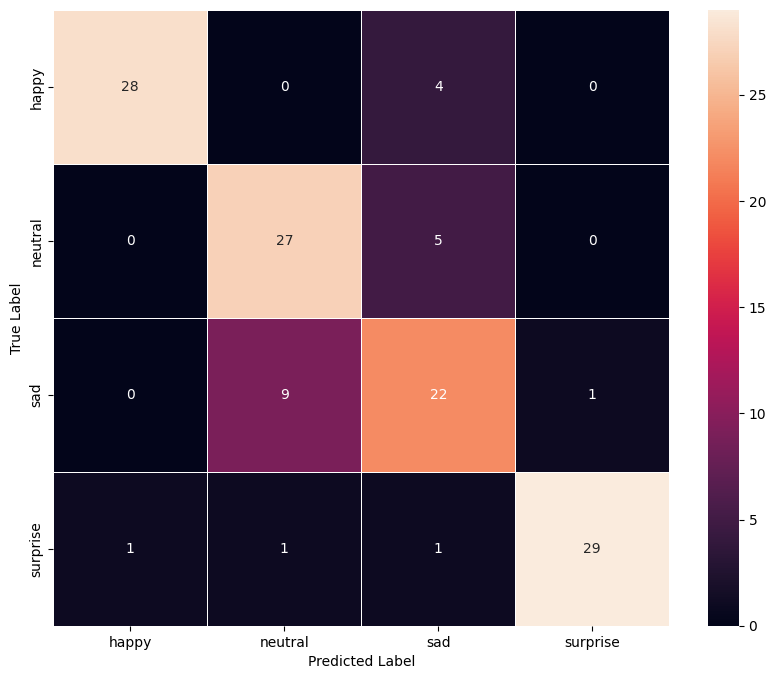

In [ ]:
#plot confusion matrix
confusion_matrix_CNN2 = tf.math.confusion_matrix(y_test_arg, y_pred_arg)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax,
    xticklabels=['happy', 'neutral','sad', 'surprise'],
    yticklabels=['happy', 'neutral','sad', 'surprise']
)
ax.set_xlabel("Predicted Label")  # Set X-axis label here
ax.set_ylabel("True Label")
plt.show()

In [ ]:
backend.clear_session()

**Observations and Insights:__**

1. This model has 4 conv layers and 2 dense layer and drop out f 0.5 just before the output layer. adding dropout at the last layer help with learning the parameters better without crating loss which can happen when added in the initial layers.
2. model accuracy for both testing and training data is around 76% and on test data is 80%. the model is performing better that the bas model in correctly predicting happy, neutral and surprise images.
3. different noise adjustment to sad and neutral resulted in better accuracy

Other observations:

1. increasing the dense layer resulted in overfitting whereas increasing the conv layers increased the trainable parameters without significantly improving the training and validation accuracy.
2. using the learning rate scheduler for SGD and Adam optimizer did not improve the accuracy of the model



## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess

## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
#import vgg16
from tensorflow.keras.applications import VGG16

In [ ]:
backend.clear_session()

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
#load model parameters
X_train, y_train = training_data(resized_training_data)
X_validate, y_validate = validation_data(resized_validating_data)
X_test, y_test = test_data(resized_testing_data)
X_train, X_validate, X_test = normalize(X_train, X_validate, X_test)
y_train_encoded, y_validate_encoded, y_test_encoded = label_encoder(y_train, y_validate, y_test)
train_generator = train_generator_1(X_train, y_train_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


###with just the base VGG model

In [ ]:
#Creating a custom model with a pre-trained VGG16 base, excluding the top, for a 224x224 input
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_vgg = Sequential()
model_vgg.add(base_model)
model_vgg.add(Flatten())

#output layer
model_vgg.add(Dense(4, activation='softmax'))

# Freeze the base model layers
base_model.trainable = False

# Compile and train
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fit the model
history_vgg = model_vgg.fit(train_generator, batch_size= 32, epochs = 1000, validation_data = (X_validate, y_validate_encoded), callbacks=[es,mc])

Epoch 1/1000
473/473 [==============================] - ETA: 0s - loss: 1.1635 - accuracy: 0.5247
Epoch 1: val_accuracy improved from -inf to 0.55716, saving model to best_model.h5
473/473 [==============================] - 160s 329ms/step - loss: 1.1635 - accuracy: 0.5247 - val_loss: 1.0794 - val_accuracy: 0.5572
Epoch 2/1000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


473/473 [==============================] - ETA: 0s - loss: 1.0141 - accuracy: 0.5890
Epoch 2: val_accuracy improved from 0.55716 to 0.68053, saving model to best_model.h5
473/473 [==============================] - 146s 310ms/step - loss: 1.0141 - accuracy: 0.5890 - val_loss: 0.8169 - val_accuracy: 0.6805
Epoch 3/1000
473/473 [==============================] - ETA: 0s - loss: 0.9661 - accuracy: 0.6107
Epoch 3: val_accuracy did not improve from 0.68053
473/473 [==============================] - 147s 311ms/step - loss: 0.9661 - accuracy: 0.6107 - val_loss: 1.2882 - val_accuracy: 0.5923
Epoch 4/1000
473/473 [==============================] - ETA: 0s - loss: 0.9718 - accuracy: 0.6132
Epoch 4: val_accuracy did not improve from 0.68053
473/473 [==============================] - 144s 305ms/step - loss: 0.9718 - accuracy: 0.6132 - val_loss: 0.8856 - val_accuracy: 0.6618
Epoch 5/1000
473/473 [==============================] - ETA: 0s - loss: 0.9307 - accuracy: 0.6316
Epoch 5: val_accuracy did no

In [ ]:
model_vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 4)                 100356    
                                                                 
Total params: 14815044 (56.51 MB)
Trainable params: 100356 (392.02 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
#accuracy on test data
accuracy = model_vgg.evaluate(X_test, y_test_encoded, verbose =1)

4/4 [==============================] - 0s 45ms/step - loss: 0.7225 - accuracy: 0.7031


In [ ]:
y_pred= model_vgg.predict(X_test)

4/4 [==============================] - 0s 42ms/step


In [ ]:
# Converting predicted probabilities to class indices for predictions and actual labels.
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg= np.argmax(y_test_encoded, axis=1)

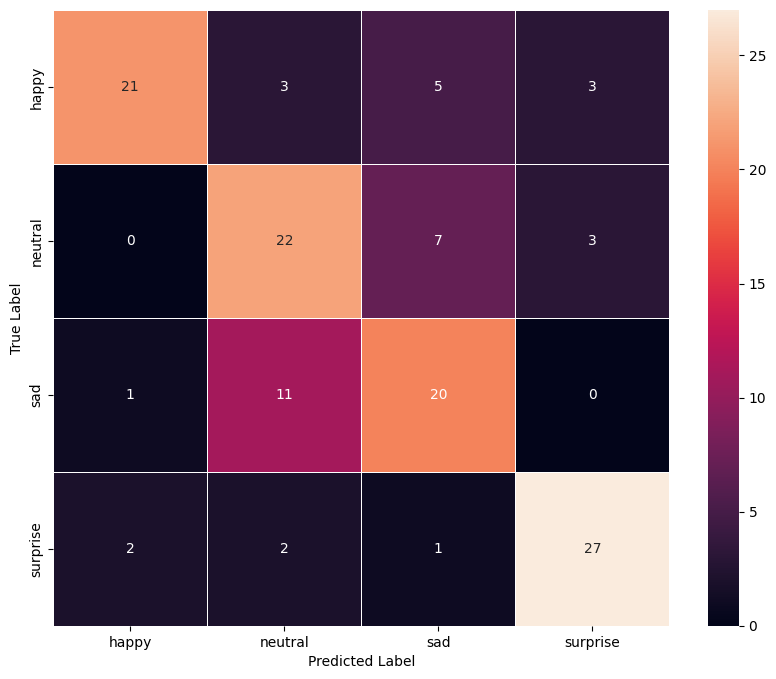

In [ ]:
#plot confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax,
    xticklabels=['happy', 'neutral','sad', 'surprise'],
    yticklabels=['happy', 'neutral','sad', 'surprise']
)
ax.set_xlabel("Predicted Label")  # Set X-axis label here
ax.set_ylabel("True Label")
plt.show()

### **Compiling and Training the VGG16 Model with additional FC layer**

In [ ]:
X_train.shape

(15109, 224, 224, 3)

In [ ]:
#Creating a custom model with a pre-trained VGG16 base, excluding the top, for a 224x224 input
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_vgg = Sequential()
model_vgg.add(base_model)
model_vgg.add(Flatten())

# Adding a dense layer on top of the base model
model_vgg.add(Dense(1024, activation='relu'))
model_vgg.add(Dropout(0.5))

#output layer
model_vgg.add(Dense(4, activation='softmax'))

# Freeze the base model layers
base_model.trainable = False

# Compile and train
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
model_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 40409924 (154.15 MB)
Trainable params: 25695236 (98.02 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
#fit the model
history_vgg = model_vgg.fit(train_generator, batch_size= 32, epochs = 1000, validation_data = (X_validate, y_validate_encoded), callbacks=[es,mc])

Epoch 1/1000
473/473 [==============================] - ETA: 0s - loss: 1.4732 - accuracy: 0.4474
Epoch 1: val_accuracy improved from -inf to 0.57123, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


473/473 [==============================] - 195s 390ms/step - loss: 1.4732 - accuracy: 0.4474 - val_loss: 1.0539 - val_accuracy: 0.5712
Epoch 2/1000
473/473 [==============================] - ETA: 0s - loss: 1.1403 - accuracy: 0.4847
Epoch 2: val_accuracy improved from 0.57123 to 0.57906, saving model to best_model.h5
473/473 [==============================] - 177s 375ms/step - loss: 1.1403 - accuracy: 0.4847 - val_loss: 1.0019 - val_accuracy: 0.5791
Epoch 3/1000
473/473 [==============================] - ETA: 0s - loss: 1.1398 - accuracy: 0.4787
Epoch 3: val_accuracy improved from 0.57906 to 0.62447, saving model to best_model.h5
473/473 [==============================] - 174s 367ms/step - loss: 1.1398 - accuracy: 0.4787 - val_loss: 0.9416 - val_accuracy: 0.6245
Epoch 4/1000
473/473 [==============================] - ETA: 0s - loss: 1.1049 - accuracy: 0.4994
Epoch 4: val_accuracy did not improve from 0.62447
473/473 [==============================] - 162s 343ms/step - loss: 1.1049 - ac

In [ ]:
w = model_1.load_weights("/content/best_model.h5")
w

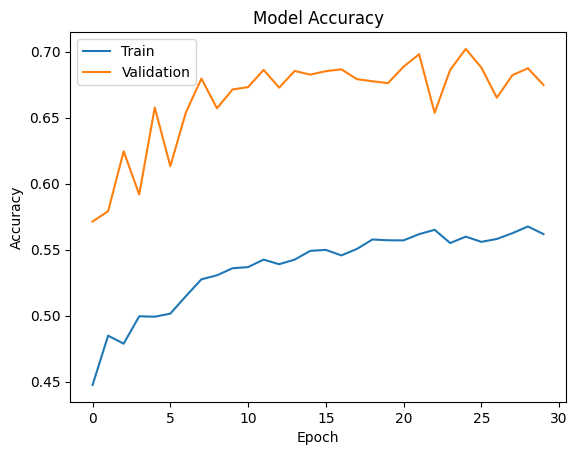

In [ ]:
#plot the accuracy
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
backend.clear_session()

### **Evaluating the VGG16 model**

In [ ]:
#accuracy on test data
accuracy = model_vgg.evaluate(X_test, y_test_encoded, verbose =1)

4/4 [==============================] - 1s 127ms/step - loss: 0.8081 - accuracy: 0.7266


In [ ]:
y_pred= model_vgg.predict(X_test)

4/4 [==============================] - 1s 131ms/step


In [ ]:
# Converting predicted probabilities to class indices for predictions and actual labels.
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg= np.argmax(y_test_encoded, axis=1)

In [ ]:
#find model performance on test data
from sklearn.metrics import classification_report
print(classification_report(y_test_arg,y_pred_arg))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        32
           1       0.55      0.88      0.67        32
           2       0.69      0.56      0.62        32
           3       1.00      0.66      0.79        32

    accuracy                           0.73       128
   macro avg       0.78      0.73      0.73       128
weighted avg       0.78      0.73      0.73       128



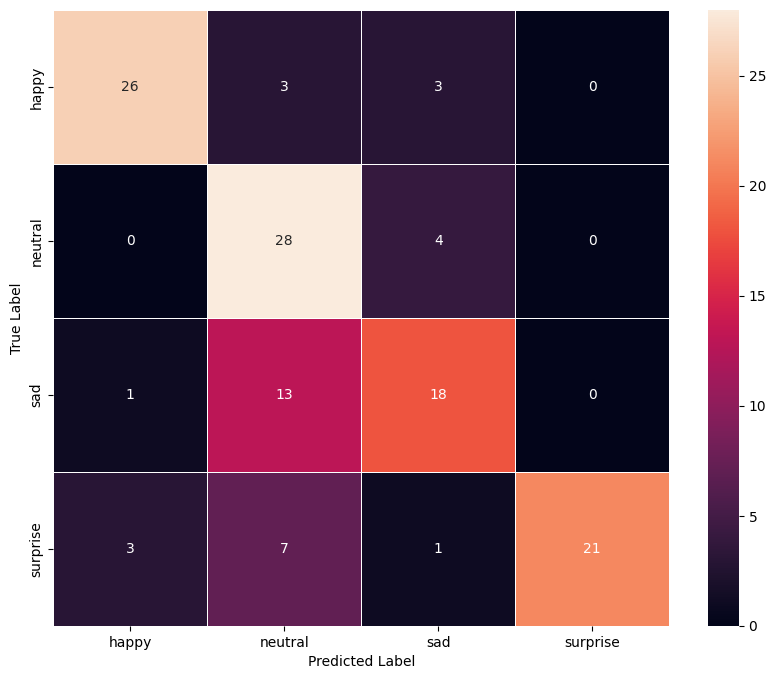

In [ ]:
#plot confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax,
    xticklabels=['happy', 'neutral','sad', 'surprise'],
    yticklabels=['happy', 'neutral','sad', 'surprise']
)
ax.set_xlabel("Predicted Label")  # Set X-axis label here
ax.set_ylabel("True Label")
plt.show()

***Observations and Insights***

1. The standard input image size for VGG base model is 224X224. hence the images in the dataset is reshaped to 224X224.
2. The first VGG model trained on just base layer produced training, validation and test accuracy of 69%, 65% and 70%.
3. Adding Dense layer on top of the trained model resulted in the training accuracy of 57%, validation accuracy of 71% and testing accuracy of 72%. The model learned to generalise better with the addition of FC layer
4. Number of trainable parameters for 1st model is 100356 whereas number of trainable parameters for second model is 25695236. the second model significantly increased the computational cost.
4. Training the model with original image size was faster to execute but the accuracy of the model dropped by half to that of rescaled image size.



## **ResNet V2 Model**

In [ ]:
backend.clear_session()

In [ ]:
from tensorflow.keras.applications import ResNet50V2

In [ ]:
# Load the ResNetV2 model pre-trained on ImageNet data, excluding the top (classification) layer
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224,224, 3))

# Freeze all layers in the base model by making them non-trainable
for layer in base_model.layers:
    layer.trainable = False

94668760/94668760 [==============================] - 3s 0us/step


### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# load the parameters
X_train, y_train = training_data(resized_training_data)
print(len(resized_training_data))
X_validate, y_validate = validation_data(resized_validating_data)
X_test, y_test = test_data(resized_testing_data)
X_train, X_validate, X_test = normalize(X_train, X_validate, X_test)
y_train_encoded, y_validate_encoded, y_test_encoded = label_encoder(y_train, y_validate, y_test)
train_generator = train_generator_1(X_train, y_train_encoded)

15109


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
# Create the custom layers to add on top of the ResNetV2 base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)

# Final layer with softmax activation
predictions = Dense(4, activation='softmax')(x)

# This is the model we will train
model_resnetv2 = Model(inputs=base_model.input, outputs=predictions)



In [ ]:
X_train.shape, X_validate.shape, X_test.shape

((15109, 224, 224, 3), (4977, 224, 224, 3), (128, 224, 224, 3))

In [ ]:
model_resnetv2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                              

### **Compiling and Training the Model**

In [ ]:
model_resnetv2.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
#fit the model
history_resnetv2 = model_resnetv2.fit(train_generator, batch_size= 32, epochs = 1000, validation_data = (X_validate, y_validate_encoded), callbacks=[es,mc])

Epoch 1/1000
473/473 [==============================] - ETA: 0s - loss: 1.0484 - accuracy: 0.5650
Epoch 1: val_accuracy improved from -inf to 0.65320, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


473/473 [==============================] - 161s 327ms/step - loss: 1.0484 - accuracy: 0.5650 - val_loss: 0.8452 - val_accuracy: 0.6532
Epoch 2/1000
473/473 [==============================] - ETA: 0s - loss: 0.9174 - accuracy: 0.6181
Epoch 2: val_accuracy did not improve from 0.65320
473/473 [==============================] - 145s 306ms/step - loss: 0.9174 - accuracy: 0.6181 - val_loss: 0.8901 - val_accuracy: 0.6462
Epoch 3/1000
473/473 [==============================] - ETA: 0s - loss: 0.8894 - accuracy: 0.6259
Epoch 3: val_accuracy improved from 0.65320 to 0.66787, saving model to best_model.h5
473/473 [==============================] - 146s 309ms/step - loss: 0.8894 - accuracy: 0.6259 - val_loss: 0.8126 - val_accuracy: 0.6679
Epoch 4/1000
473/473 [==============================] - ETA: 0s - loss: 0.8665 - accuracy: 0.6468
Epoch 4: val_accuracy improved from 0.66787 to 0.68234, saving model to best_model.h5
473/473 [==============================] - 143s 303ms/step - loss: 0.8665 - ac

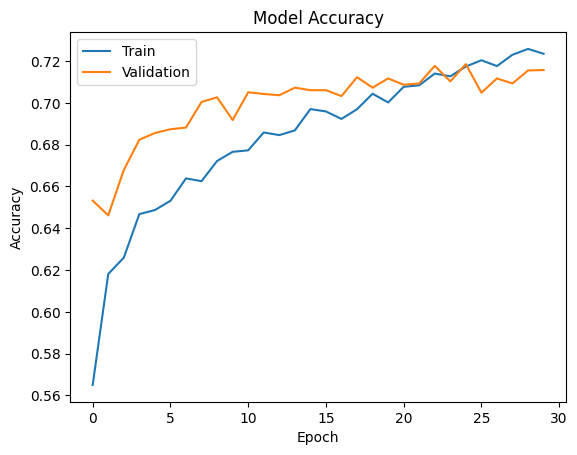

In [ ]:
#plot the training and validation accuracy
plt.plot(history_resnetv2.history['accuracy'])
plt.plot(history_resnetv2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Evaluating the ResNet Model**

In [ ]:
#check for test model accuracy
accuracy = model_resnetv2.evaluate(X_test, y_test_encoded, verbose =1)

4/4 [==============================] - 0s 37ms/step - loss: 0.7885 - accuracy: 0.6953


In [ ]:
y_pred= model_resnetv2.predict(X_test)

4/4 [==============================] - 1s 32ms/step


In [ ]:
# Converting predicted probabilities to class indices for predictions and actual labels.
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg= np.argmax(y_test_encoded, axis=1)

In [ ]:
#print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_arg,y_pred_arg))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.53      0.75      0.62        32
           2       0.68      0.59      0.63        32
           3       0.85      0.69      0.76        32

    accuracy                           0.70       128
   macro avg       0.72      0.70      0.70       128
weighted avg       0.72      0.70      0.70       128



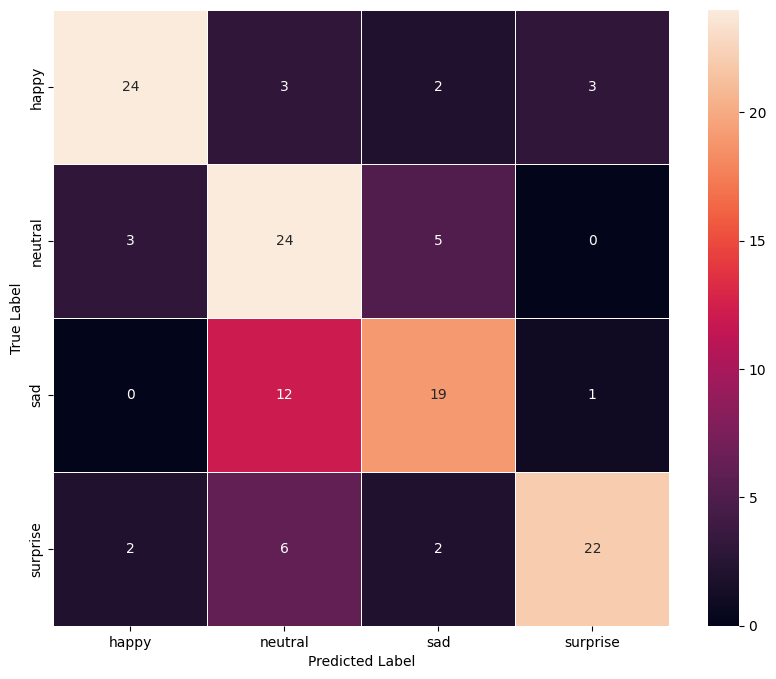

In [ ]:
#plot the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax,
    xticklabels=['happy', 'neutral','sad', 'surprise'],
    yticklabels=['happy', 'neutral','sad', 'surprise']
)
ax.set_xlabel("Predicted Label")  # Set X-axis label here
ax.set_ylabel("True Label")
plt.show()

1. for original size image the accuracy of the model with 2 fully connected (FC) dense layer with depth 1024 and 256, gave training accuracy of 57% and validation accuracy of 56%.
2. For resized image,  training with 1extra dense layer with depth 1024 layer and drop out 0.3: training accuracy: 72, validation accuracy: 72, training accuracy 70. The number of trainable parameters are 2102276.
2. Model performance is better with rescaled image to match the Resnet model.






## **EfficientNet Model**

In [ ]:
backend.clear_session()

In [ ]:
!pip install efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.2 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.applications import efficientnet_v2

In [ ]:
# Load the Efficientnet v2 model pre-trained on ImageNet data, excluding the top (classification) layer
base_model = efficientnet_v2.EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(224,224, 3))

# Freeze all layers in the base model by making them non-trainable
for layer in base_model.layers:
    layer.trainable = False

### **Model Building**

- Import Efficient v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# load the model parameters
X_train, y_train = training_data(resized_training_data)
X_validate, y_validate = validation_data(resized_validating_data)
X_test, y_test = test_data(resized_testing_data)
X_train, X_validate, X_test = normalize(X_train, X_validate, X_test)
y_train_encoded, y_validate_encoded, y_test_encoded = label_encoder(y_train, y_validate, y_test)
train_generator = train_generator_1(X_train, y_train_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
# Create the custom layers to add on top of the ResNetV2 base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256)(x)  # Example of a new FC layer
x = LeakyReLU(alpha=0.1)(x)
#x = Dense(256, activation='relu')(x)  # Example of a new FC layer
 # Example of a new FC layer
#x = Dropout(0.5)(x)  # Example of a dropout layer for regularization
predictions = Dense(4, activation='softmax')(x)  # Final layer with softmax activation

# This is the model we will train
model_efficientnetv2 = Model(inputs=base_model.input, outputs=predictions)



In [ ]:
X_train.shape, X_validate.shape, X_test.shape

((15109, 224, 224, 3), (4977, 224, 224, 3), (128, 224, 224, 3))

In [ ]:
y_train_encoded.shape, y_validate_encoded.shape, y_test_encoded.shape

((15109, 4), (4977, 4), (128, 4))

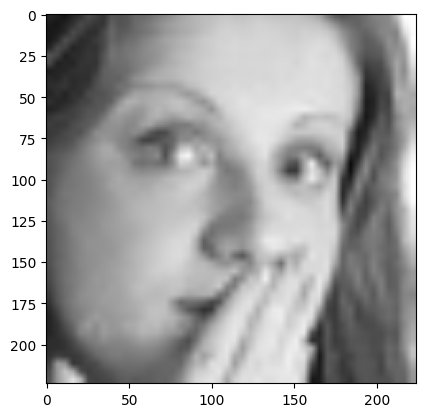

In [ ]:
plt.imshow(X_train[90])

In [ ]:
y_train_encoded[90]

array([0., 0., 0., 1.], dtype=float32)

### **Compiling and Training the Model**

In [ ]:
#compile the model
model_efficientnetv2.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history_efficientnetv2 = model_efficientnetv2.fit(train_generator, batch_size= 32, epochs = 1000, validation_data = (X_validate, y_validate_encoded), callbacks=[es,mc])

Epoch 1/1000
473/473 [==============================] - ETA: 0s - loss: 1.4006 - accuracy: 0.2679
Epoch 1: val_accuracy improved from -inf to 0.22885, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


473/473 [==============================] - 172s 340ms/step - loss: 1.4006 - accuracy: 0.2679 - val_loss: 1.4228 - val_accuracy: 0.2289
Epoch 2/1000
473/473 [==============================] - ETA: 0s - loss: 1.3871 - accuracy: 0.2620
Epoch 2: val_accuracy improved from 0.22885 to 0.36669, saving model to best_model.h5
473/473 [==============================] - 150s 316ms/step - loss: 1.3871 - accuracy: 0.2620 - val_loss: 1.3661 - val_accuracy: 0.3667
Epoch 3/1000
473/473 [==============================] - ETA: 0s - loss: 1.3867 - accuracy: 0.2634
Epoch 3: val_accuracy did not improve from 0.36669
473/473 [==============================] - 149s 316ms/step - loss: 1.3867 - accuracy: 0.2634 - val_loss: 1.3516 - val_accuracy: 0.3667
Epoch 4/1000
473/473 [==============================] - ETA: 0s - loss: 1.3850 - accuracy: 0.2608
Epoch 4: val_accuracy did not improve from 0.36669
473/473 [==============================] - 153s 324ms/step - loss: 1.3850 - accuracy: 0.2608 - val_loss: 1.3722 -

1. training with 1extra dense layer with depth 1024 layer and drop out 0.5, relu activation, learning rate 0.0001: training accuracy: 27, validation accuracy: 36
2. 2 dense layer 512 and 256 without dropout, relu activation, LR 0.0001: 37% validation and 27% training

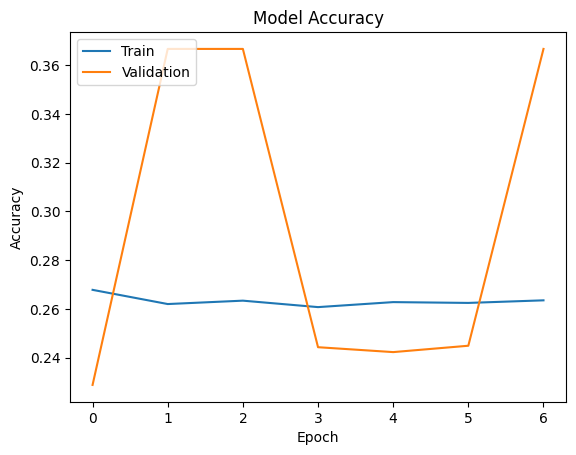

In [ ]:
#plot the accuracy
plt.plot(history_efficientnetv2.history['accuracy'])
plt.plot(history_efficientnetv2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Evaluating the EfficientNet Model**

In [ ]:
#accuracy of test dataset
accuracy = model_efficientnetv2.evaluate(X_test, y_test_encoded, verbose =1)

4/4 [==============================] - 0s 27ms/step - loss: 1.4017 - accuracy: 0.2500


In [ ]:
y_pred= model_efficientnetv2.predict(X_test)

4/4 [==============================] - 2s 23ms/step


In [ ]:
# Converting predicted probabilities to class indices for predictions and actual labels.
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg= np.argmax(y_test_encoded, axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_arg,y_pred_arg))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40        32
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        32

    accuracy                           0.25       128
   macro avg       0.06      0.25      0.10       128
weighted avg       0.06      0.25      0.10       128



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


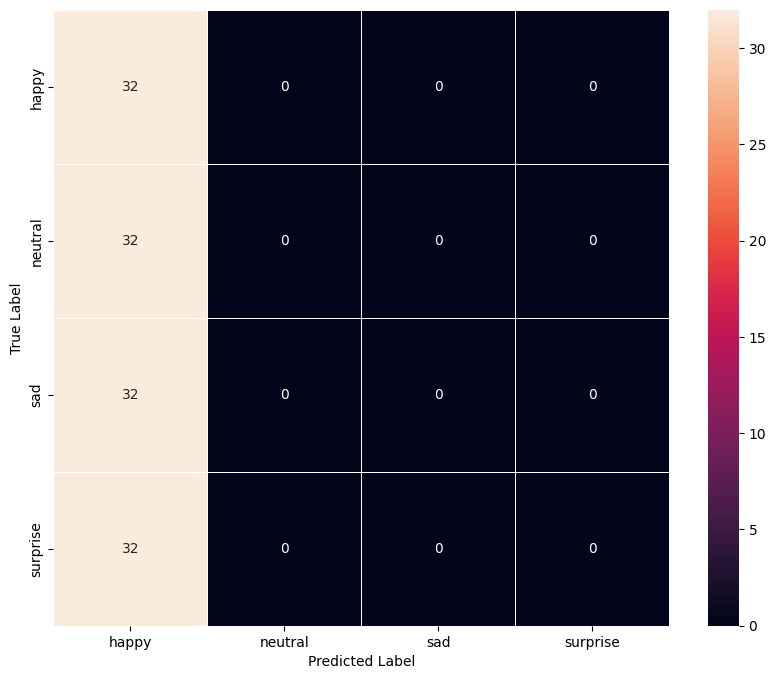

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax,
    xticklabels=['happy', 'neutral','sad', 'surprise'],
    yticklabels=['happy', 'neutral','sad', 'surprise']
)
ax.set_xlabel("Predicted Label")  # Set X-axis label here
ax.set_ylabel("True Label")
plt.show()

**Observations and Insights:__**

The model is classifying all data to one particular category.

**Transfer learning model observations**:

1. Among the transfer learning models, Resnet has shown better accuracy compared to VGG and EfficientNet model.
2. For relatively same accuracy, number of trainable parameters of vgg16 is much higher than the Resnet model.
3. Efficient net has least accuracy. it is classifying all the data to one particular category.
3. Transfer learning models increase the computational cost because of increaased trainable parameters.


Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
backend.clear_session()

In [ ]:

CATEGORIES = ['happy','neutral','sad','surprise']
IMG_SIZE = 224

def gray_scale_image(gray_scale_dataset, DATADIR):

  for i in CATEGORIES:
    path = os.path.join(DATADIR, i)
    class_num = CATEGORIES.index(i)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      #convert image to gray scale
      gray_image = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
      gray_scale_dataset.append([gray_image,class_num])

  return gray_scale_dataset

In [ ]:
DATADIR = '/content/Facial_emotion_images/train'
gray_scale_training_data = []
gray_scale_training_data = gray_scale_image(gray_scale_training_data, DATADIR)

In [ ]:
DATADIR = '/content/Facial_emotion_images/test'
gray_scale_testing_data = []
gray_scale_testing_data = gray_scale_image(gray_scale_testing_data, DATADIR)

In [ ]:
DATADIR = '/content/Facial_emotion_images/validation'
gray_scale_validating_data = []
gray_scale_validating_data = gray_scale_image(gray_scale_validating_data, DATADIR)

In [ ]:
#load the model. Data augmention is not applied since its gray scale image
X_train, y_train = training_data(gray_scale_training_data)
X_validate, y_validate = validation_data(gray_scale_validating_data)
X_test, y_test = test_data(gray_scale_testing_data)
X_train, X_validate, X_test = normalize(X_train, X_validate, X_test)
y_train_encoded, y_validate_encoded, y_test_encoded = label_encoder(y_train, y_validate, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [ ]:
model_gray = Sequential()

#1st conv layer
model_gray.add(Conv2D(256, (3,3), padding = 'same', input_shape =(48,48,1)))
model_gray.add(LeakyReLU(alpha=0.1))
model_gray.add(MaxPooling2D(padding = 'same'))

#2nd conv layer
model_gray.add(Conv2D(64, (3,3), padding = 'same'))
model_gray.add(LeakyReLU(alpha=0.1))

model_gray.add(BatchNormalization())

model_gray.add(Dropout(0.25))

#3rd conv layer
model_gray.add(Conv2D(256, (3,3), padding = 'same'))
model_gray.add(LeakyReLU(alpha=0.1))
model_gray.add(MaxPooling2D(padding = 'same'))

#4th conv layer
model_gray.add(Conv2D(64, (3,3), padding = 'same'))
model_gray.add(LeakyReLU(alpha=0.1))
model_gray.add(MaxPooling2D(padding = 'same'))

#5th conv layer
model_gray.add(Conv2D(128,(3,3), padding = 'same'))
model_gray.add(LeakyReLU(alpha=0.1))
model_gray.add(MaxPooling2D((2,2), padding= 'same'))

model_gray.add(BatchNormalization())

model_gray.add(Flatten())

#1st dense layer
model_gray.add(Dense(64,kernel_regularizer=l2(0.004)))
model_gray.add(LeakyReLU(alpha=0.1))

model_gray.add(Dropout(0.6))

model_gray.add(Dense(4, activation='softmax'))

model_gray.compile(optimizer = Adam(learning_rate=0.001),
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy'])

model_gray.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       2560      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        147520    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 24, 24, 64)        0         
                                                                 
 batch_normalization (Batch  (None, 24, 24, 64)        256       
 Normalization)                                         

### **Compiling and Training the Model**

In [ ]:
es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose= 1, patience= 5)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode ='max', verbose = 1, save_best_only=True)

In [ ]:
history_gray = model_gray.fit(X_train,y_train_encoded, batch_size= 32, epochs = 1000, validation_data = (X_validate, y_validate_encoded), callbacks=[es,mc])

Epoch 1/1000
472/473 [============================>.] - ETA: 0s - loss: 1.7297 - accuracy: 0.3653
Epoch 1: val_accuracy improved from -inf to 0.52059, saving model to best_model.h5
473/473 [==============================] - 13s 23ms/step - loss: 1.7296 - accuracy: 0.3653 - val_loss: 1.3640 - val_accuracy: 0.5206
Epoch 2/1000
  4/473 [..............................] - ETA: 9s - loss: 1.1760 - accuracy: 0.6016 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/473 [============================>.] - ETA: 0s - loss: 1.2824 - accuracy: 0.5275
Epoch 2: val_accuracy improved from 0.52059 to 0.55957, saving model to best_model.h5
473/473 [==============================] - 11s 22ms/step - loss: 1.2824 - accuracy: 0.5274 - val_loss: 1.1693 - val_accuracy: 0.5596
Epoch 3/1000
472/473 [============================>.] - ETA: 0s - loss: 1.0822 - accuracy: 0.5890
Epoch 3: val_accuracy did not improve from 0.55957
473/473 [==============================] - 11s 22ms/step - loss: 1.0823 - accuracy: 0.5889 - val_loss: 1.3344 - val_accuracy: 0.3882
Epoch 4/1000
472/473 [============================>.] - ETA: 0s - loss: 0.9835 - accuracy: 0.6274
Epoch 4: val_accuracy did not improve from 0.55957
473/473 [==============================] - 11s 22ms/step - loss: 0.9833 - accuracy: 0.6276 - val_loss: 1.3075 - val_accuracy: 0.5206
Epoch 5/1000
472/473 [============================>.] - ETA: 0s - loss: 0.9065 - accuracy: 0.6641
Epoch 5: val_accuracy improved fro

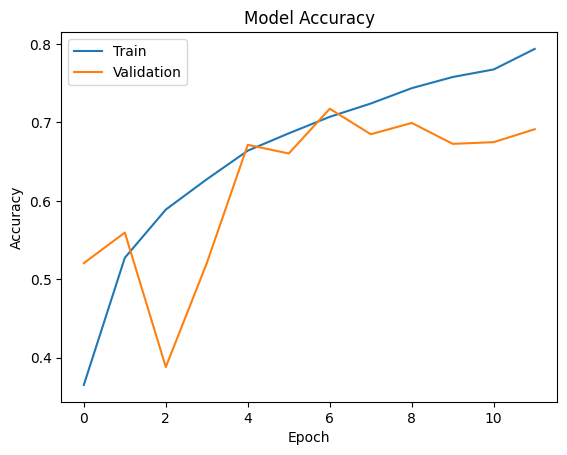

In [ ]:
plt.plot(history_gray.history['accuracy'])
plt.plot(history_gray.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Evaluating the Model on the Test Set**

In [ ]:
accuracy = model_gray.evaluate(X_test, y_test_encoded, verbose =1)

4/4 [==============================] - 0s 9ms/step - loss: 0.8287 - accuracy: 0.6875


In [ ]:
y_pred= model_gray.predict(X_test)

4/4 [==============================] - 0s 7ms/step


In [ ]:
y_pred.shape

(128, 4)

In [ ]:
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg= np.argmax(y_test_encoded, axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_arg,y_pred_arg))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.67      0.31      0.43        32
           2       0.48      0.81      0.60        32
           3       0.93      0.81      0.87        32

    accuracy                           0.69       128
   macro avg       0.73      0.69      0.68       128
weighted avg       0.73      0.69      0.68       128



In [ ]:
y_train.Label.value_counts(normalize =True)

2    0.263552
1    0.263287
0    0.263154
3    0.210007
Name: Label, dtype: float64

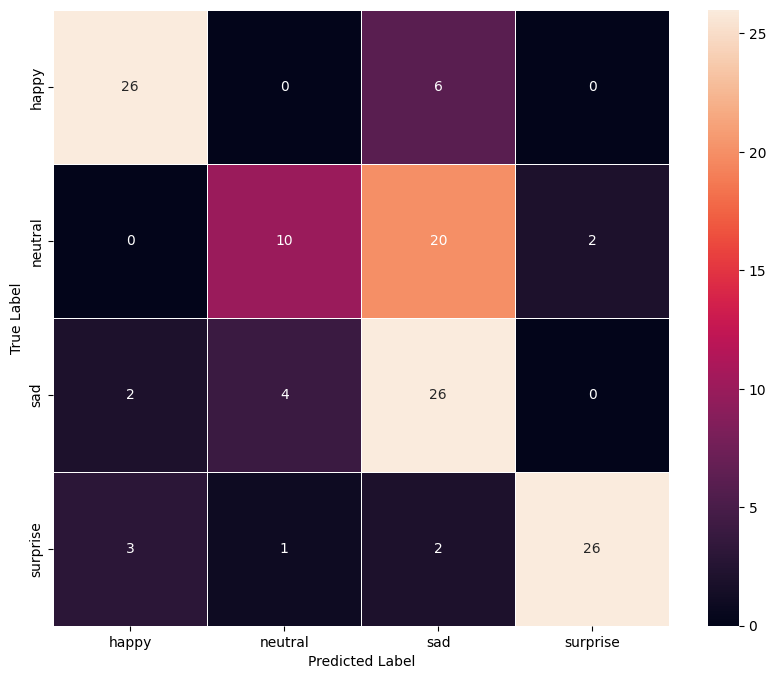

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax,
    xticklabels=['happy', 'neutral','sad', 'surprise'],
    yticklabels=['happy', 'neutral','sad', 'surprise']
)
ax.set_xlabel("Predicted Label")  # Set X-axis label here
ax.set_ylabel("True Label")
plt.show()

In [ ]:
backend.clear_session()

**Observations and Insights:__**
1. There are less trainable parameters compared to RGB model though the model is more complex.
2. Because of increased depth model was overfitting on training data. the accuracy of the training dataset was 94% while for validation set it was hovering around 69%.
3. This issue is addressed by adding 2 dropout layer one at the beginning and other after the dense layer.
4. Even with increased depth the model performannce was not able to beat the 2nd conv model which gave accuracy og 76% for both training and validation data and 80% for test data. Whereas this model accuracy for training data is 79%, validation is 72% and test accuracy is 68%. the model is still overfitting.

### **Plotting the Confusion Matrix for the chosen final model**

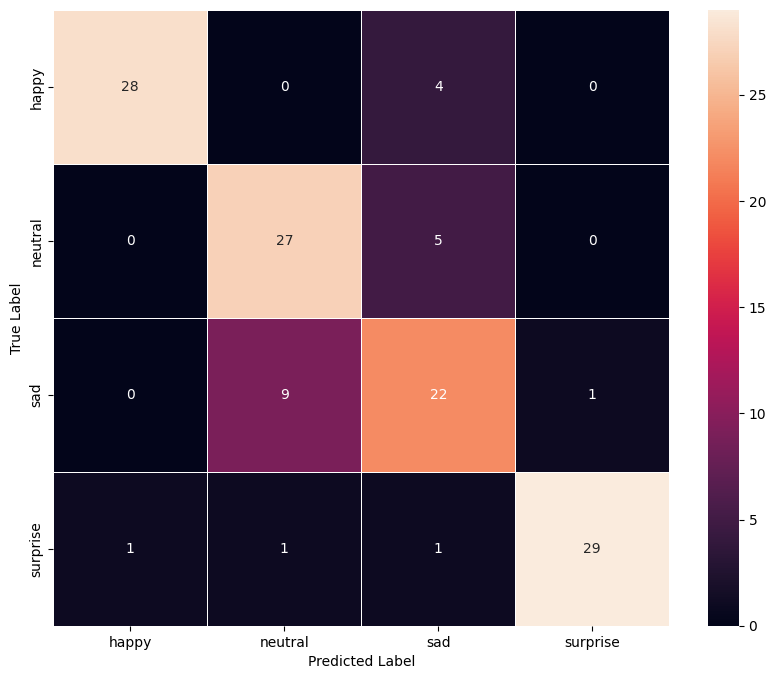

In [ ]:
confusion_matrix_CNN2 = tf.math.confusion_matrix(y_test_arg, y_pred_arg)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax,
    xticklabels=['happy', 'neutral','sad', 'surprise'],
    yticklabels=['happy', 'neutral','sad', 'surprise']
)
ax.set_xlabel("Predicted Label")  # Set X-axis label here
ax.set_ylabel("True Label")
plt.show()

## **Conclusion:**
1. though in training dataset surprise category images was 25% less compared to other categories, almost all models were able to predict the result accurately since the images had distinct feature that differentiated from other categories.
2. Images belonging to categories Sad and Neutral had similar features, hence data augmentations and noise is applied on their training data to help model in training.
1. The best model is the second CNN model with 3cnn layers. The model has 1 dropout layer to avoid overfitting and Ridge regualizer to ensure the model doesn't overly focus on the training data's minor details
3. The learnable parameters was less compared to transfer learning architectures and more to that of base cnn model and final cnn model with gray scale image. The model is optimised to reduce overfitting and generalisations.
5. training the image with rgb, even though image is black and white resulted in better model performance probably because of more learnable parameters that result from using rgb filters. this is seen in the last model
5. the transfer learning models either resulted in overfitting or underfitting. adding more dense layer resulted in overfitting and increased computational cost while decreasing the layers and its depth resulted in underfitting.  
